# Problem 2: Implementing a Multi-layer Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# !pip install seaborn
# Install seaborn (needed to plot confusion matrix) by uncommenting the above line

### Forward Pass

In [56]:
def sigmoid_forward(a):
    # calculates the sigmoid activation function
    # a: pre-activation values
    # returns: activated values
    return np.exp(a)/(1+np.exp(a))

def sigmoid_backward(grad_accum, a):
    # grad_accum: the gradient of the loss function w.r.t to z
    # a: the pre-activation values
    # returns: the gradient of the loss w.r.t to the preactivation values, a
    return grad_accum*sigmoid_forward(a)*(1-sigmoid_forward(a))
    

def linear_forward(x, weight, bias):
    # Computes the forward pass of the linear layer
    # x: input of layer
    # weight, bias: weights and bias of neural network layer
    # returns: output of linear layer
    return bias+ np.dot(weight,x)

def linear_backward(grad_accum, x, weight, bias):
    #  Derivative of the linear layer w.r.t 
    # grad_accum: gradient of loss w.r.t function after linear layer
    # returns dl_dw: gradient of loss w.r.t to weights 
    # returns dl_dx: gradient of loss w.r.t to input, x  
    return np.dot(grad_accum.reshape(len(grad_accum),1),x.reshape(1,len(x)))
    
    
def softmax_xeloss_forward(b, labels):
    # Input parameters: 
    ## b: pre-activation 
    # calculates the softmax of the vector b
    # calculates the cross entropy loss between the softmax of b and the labels 
    # returns: l
    temp= np.exp(b- np.max(b,))
    y_pred= temp/np.sum(temp,axis=0) 
    loss= np.mean(0.5 * np.square(y_pred -labels))
    return loss, y_pred
    
    
def softmax_xeloss_backward(yhat, labels):
    # Input parameters:
    # yhat: predictions of the neural network
    # labels: target of the network
    # returns: dl_db gradient of loss w.r.t to b
    return yhat-labels
    
def data_load():
    # load in the data provided in "data/"
    train= np.loadtxt('fashion_mnist/train.csv', delimiter=',')
    test= np.loadtxt('fashion_mnist/test.csv', delimiter=',')
   
    X_train= train[:,:-1]
    y_train= train[:,-1]
    X_test= test[:,:-1]
    y_test= test[:,-1]
    return X_train, y_train, X_test, y_test

def load_params():
    alpha_weights = np.loadtxt('params/alpha1.txt', delimiter=',')
    beta_weights = np.loadtxt('params/alpha2.txt', delimiter=',')
    alpha_bias= np.loadtxt('params/beta1.txt', delimiter=',')
    beta_bias = np.loadtxt('params/beta2.txt', delimiter=',')
    return alpha_weights, beta_weights, alpha_bias, beta_bias

def one_hot_encode(y):
    encoded=[]
    for i in range(len(y)):
        a=np.zeros(10)
        a[int(y[i])]=1
        encoded.append(a)
    return encoded


def train(batchsize=1 , eta = 0.01, num_epochs=100, h = 256,init = 'random',lr=0.1):
    X_train, y_train, X_test, y_test = data_load()  
    
    y_train = one_hot_encode(y_train) 
    y_test = one_hot_encode(y_test) 

    if init == 'default':
        alpha_weights, beta_weights, alpha_bias, beta_bias = load_params()
    elif init=='zeros':
        alpha_weights=np.zeros((256, 784))
        beta_weights=np.zeros((10, 256))
        alpha_bias=np.zeros(256,)
        beta_bias=np.zeros(10,)
    elif init=='ones':
        alpha_weights=np.ones((256, 784))
        beta_weights=np.ones((10, 256))
        alpha_bias=np.ones((256,))
        beta_bias=np.ones((10,))
    elif init=='random':
        alpha_weights=np.random.uniform(-1,1,(256, 784))
        beta_weights=np.random.uniform(-1,1,(10, 256))
        alpha_bias=np.random.uniform(-1,1,(256,))
        beta_bias=np.random.uniform(-1,1,(10,))
    train_loss_list = []
    test_loss_list = []
    acc_list = []
    pred= [] 

    ### Weights and biases clubed for easy of matrix multiplication
    alpha_combined= np.hstack((alpha_bias.reshape((len(alpha_bias),1)), alpha_weights))
    beta_combined= np.hstack((beta_bias.reshape(len(beta_bias),1),beta_weights)) 
    for epoch in (range(num_epochs)):
        for j in range (int(len(y_train))):
          
            ### Forward Pass
            x_biases= np.ones(np.shape(X_train[j][1]))
            x= np.hstack((x_biases,X_train[j]))  
            
            ### Linear Forward
            weight=alpha_combined[:,1:]
            bias=alpha_combined[:,1]
            a= linear_forward(x[1:].T,weight,bias)
            
            ### Sigmoid Forward
            z_weights= sigmoid_forward(a)
            z= np.hstack((np.ones(1), z_weights))  

            ### Linear Forward
            weight=beta_combined[:,1:]
            bias=beta_combined[:,1]
            b= linear_forward(z[1:],weight,bias)

            loss, y_pred= softmax_xeloss_forward(b, y_train[j])

    return alpha_combined[:,1:],alpha_combined[:,0],beta_combined[:,1:],beta_combined[:,0]

In [57]:
pred=train(batchsize=1 , eta = 0.01, num_epochs=1, h = 256, init='default')

In [58]:
pred

(array([[ 0.60556094,  0.64254594,  0.05705361, ..., -1.05597755,
         -0.89248972, -0.69007386],
        [-0.68366859, -0.28590731,  0.17090862, ...,  0.56370403,
         -0.25249979,  0.19171392],
        [-1.3669347 , -0.72846995,  1.32743341, ...,  1.78056972,
         -0.061802  , -1.19642083],
        ...,
        [ 1.01772174, -0.71310588, -1.28105595, ..., -0.62605854,
         -1.04516961,  0.35689178],
        [-0.12887038,  0.31563304, -1.1821819 , ...,  2.31388214,
          0.0410186 , -0.47195239],
        [-1.56878674, -0.00803133, -0.69941801, ..., -0.74394939,
          0.37103286, -0.08966725]]),
 array([ 0.06346211, -0.36723148,  0.27563622,  2.18535931,  0.27418032,
         1.02741841,  1.31220529,  0.48218664, -0.7533869 , -0.08616851,
        -0.27368216,  0.02496055, -0.55757227,  1.19716263, -1.7935351 ,
        -0.9840612 , -1.36306919,  0.40770959,  0.61819667,  0.35499637,
         0.4170378 ,  0.14327232,  1.14083955,  0.96896355,  1.77781797,
        

# Effect of Initialization

### Default Weights

In [33]:
def sigmoid_forward(a):
    # calculates the sigmoid activation function
    # a: pre-activation values
    # returns: activated values
    return np.exp(a)/(1+np.exp(a))

def sigmoid_backward(grad_accum, a):
    # grad_accum: the gradient of the loss function w.r.t to z
    # a: the pre-activation values
    # returns: the gradient of the loss w.r.t to the preactivation values, a
    return grad_accum*sigmoid_forward(a)*(1-sigmoid_forward(a))
    

def linear_forward(x, weight, bias):
    # Computes the forward pass of the linear layer
    # x: input of layer
    # weight, bias: weights and bias of neural network layer
    # returns: output of linear layer
    return bias+ np.dot(weight,x)

def linear_backward(grad_accum, x, weight, bias):
    #  Derivative of the linear layer w.r.t 
    # grad_accum: gradient of loss w.r.t function after linear layer
    # returns dl_dw: gradient of loss w.r.t to weights 
    # returns dl_dx: gradient of loss w.r.t to input, x  
    return np.dot(grad_accum.reshape(len(grad_accum),1),x.reshape(1,len(x)))
    
    
def softmax_xeloss_forward(b, labels):
    # Input parameters: 
    ## b: pre-activation 
    # calculates the softmax of the vector b
    # calculates the cross entropy loss between the softmax of b and the labels 
    # returns: l
    temp= np.exp(b- np.max(b,))
    y_pred= temp/np.sum(temp,axis=0) 
    loss= np.mean(0.5 * np.square(y_pred -labels))
    return loss, y_pred
    
    
def softmax_xeloss_backward(yhat, labels):
    # Input parameters:
    # yhat: predictions of the neural network
    # labels: target of the network
    # returns: dl_db gradient of loss w.r.t to b
    return yhat-labels
    
def data_load():
    # load in the data provided in "data/"
    train= np.loadtxt('fashion_mnist/train.csv', delimiter=',')
    test= np.loadtxt('fashion_mnist/test.csv', delimiter=',')
   
    X_train= train[:,:-1]
    y_train= train[:,-1]
    X_test= test[:,:-1]
    y_test= test[:,-1]
    return X_train, y_train, X_test, y_test

def load_params():
    alpha_weights = np.loadtxt('params/alpha1.txt', delimiter=',')
    beta_weights = np.loadtxt('params/alpha2.txt', delimiter=',')
    alpha_bias= np.loadtxt('params/beta1.txt', delimiter=',')
    beta_bias = np.loadtxt('params/beta2.txt', delimiter=',')
    return alpha_weights, beta_weights, alpha_bias, beta_bias

def one_hot_encode(y):
    encoded=[]
    for i in range(len(y)):
        a=np.zeros(10)
        a[int(y[i])]=1
        encoded.append(a)
    return encoded


def train(batchsize=1 , eta = 0.01, num_epochs=100, h = 256,init = 'random',lr=0.1):
    X_train, y_train, X_test, y_test = data_load()  
    
    y_train = one_hot_encode(y_train) 
    y_test = one_hot_encode(y_test) 

    if init == 'default':
        alpha_weights, beta_weights, alpha_bias, beta_bias = load_params()
    elif init=='zeros':
        alpha_weights=np.zeros((256, 784))
        beta_weights=np.zeros((10, 256))
        alpha_bias=np.zeros(256,)
        beta_bias=np.zeros(10,)
    elif init=='ones':
        alpha_weights=np.ones((256, 784))
        beta_weights=np.ones((10, 256))
        alpha_bias=np.ones((256,))
        beta_bias=np.ones((10,))
    elif init=='random':
        alpha_weights=np.random.uniform(-1,1,(256, 784))
        beta_weights=np.random.uniform(-1,1,(10, 256))
        alpha_bias=np.random.uniform(-1,1,(256,))
        beta_bias=np.random.uniform(-1,1,(10,))
    train_loss_list = []
    test_loss_list = []
    acc_list = []
    pred= [] 

    ### Weights and biases clubed for easy of matrix multiplication
    alpha_combined= np.hstack((alpha_bias.reshape((len(alpha_bias),1)), alpha_weights))
    beta_combined= np.hstack((beta_bias.reshape(len(beta_bias),1),beta_weights)) 
    for epoch in (range(num_epochs)):
        
        
        for j in range (int(len(y_train))):
          
            ### Forward Pass
            x_biases= np.ones(np.shape(X_train[j][1]))
            x= np.hstack((x_biases,X_train[j]))  
            
            ### Linear Forward
            weight=alpha_combined[:,1:]
            bias=alpha_combined[:,1]
            a= linear_forward(x[1:].T,weight,bias)
            
            ### Sigmoid Forward
            z_weights= sigmoid_forward(a)
            z= np.hstack((np.ones(1), z_weights))  

            ### Linear Forward
            weight=beta_combined[:,1:]
            bias=beta_combined[:,1]
            b= linear_forward(z[1:],weight,bias)

            loss, y_pred= softmax_xeloss_forward(b, y_train[j])

            ### BackPropagation
            
            ### Sigmoid backwards
            dl_db= softmax_xeloss_backward(y_pred, y_train[j])
            
            ### Linear Backwards
            dl_dw2= np.dot(dl_db.reshape(len(dl_db), 1), z.reshape(1,len(z)))
            
            ### Sigmoid backwards
            dl_da= sigmoid_backward(np.dot(beta_combined[:,1:].T,dl_db), a)
            
            ### Linear Backwards
            weight=alpha_combined[:,1:]
            bias=alpha_combined[:,1]
            dl_dw1= linear_backward(dl_da, x, weight, bias)


            ### Updating weights
            alpha_combined = alpha_combined - lr*dl_dw1
            beta_combined = beta_combined - lr*dl_dw2
        error=0
        train_loss=[]
        for i in range(len(y_train)):
            x_biases= np.ones(np.shape(X_train[i][1]))
            x= np.hstack((x_biases,X_train[i]))
            a= np.dot(alpha_combined,x.T)
            weight=alpha_combined[:,1:]
            bias=alpha_combined[:,1]
            a= linear_forward(x[1:].T,weight,bias)
            
            ### Sigmoid Forward
            z_weights= sigmoid_forward(a)
            z= np.hstack((np.ones(1), z_weights))  

            ### Linear Forward
            weight=beta_combined[:,1:]
            bias=beta_combined[:,1]
            b= linear_forward(z[1:],weight,bias)

            loss, y_pred= softmax_xeloss_forward(b, y_train[i])
            prediction= np.argmax(y_pred)
            target=np.argmax(y_train[i])
            pred.append(prediction)
            if target!=prediction:
                error+=1   
            train_loss.append(loss)
        error= error/len(y_train)
        train_loss_list.append(np.mean(train_loss))
        pred.append(y_pred)
        error=0
        test_loss=[]
        for i in range(len(y_test)):
            x_biases= np.ones(np.shape(X_test[i][1]))
            x= np.hstack((x_biases,X_test[i]))
            a= np.dot(alpha_combined,x.T)
            weight=alpha_combined[:,1:]
            bias=alpha_combined[:,1]
            a= linear_forward(x[1:].T,weight,bias)
            
            ### Sigmoid Forward
            z_weights= sigmoid_forward(a)
            z= np.hstack((np.ones(1), z_weights))  

            ### Linear Forward
            weight=beta_combined[:,1:]
            bias=beta_combined[:,1]
            b= linear_forward(z[1:],weight,bias)

            loss, y_pred= softmax_xeloss_forward(b, y_test[i])
            test_loss.append(loss)
            prediction= np.argmax(y_pred)
            target=np.argmax(y_test[i])
            pred.append(prediction)
            if target!=prediction:
                error+=1          
        error= error/len(y_test)
        test_loss_list.append(np.mean(test_loss))   
    
    return train_loss_list, test_loss_list, pred

In [34]:
pred=train(batchsize=1 , eta = 0.01, num_epochs=20, h = 256, init='default')

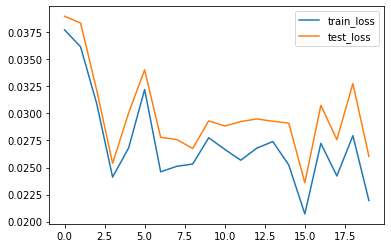

In [35]:
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss');

In [36]:
def plot_confusion(yhat, y, title):
    conf_train = np.zeros((10,10))
    for i in range(len(y)):
        conf_train[ int(yhat[i]),int(y[i]) ] += int(1)
    sns.heatmap(conf_train, annot=True, fmt='.3g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [37]:
train_ds= np.loadtxt('fashion_mnist/train.csv', delimiter=',')
test_ds= np.loadtxt('fashion_mnist/test.csv', delimiter=',')

X_train= train_ds[:,:-1]
y_train= train_ds[:,-1]
X_test= test_ds[:,:-1]
y_test= test_ds[:,-1]

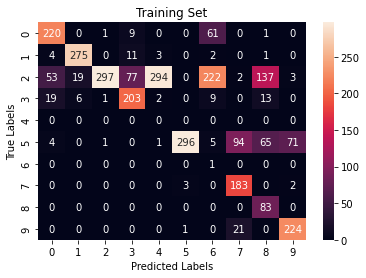

In [38]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

### Weights initialized to 0

In [39]:
pred=train(batchsize=1 , eta = 0.01, num_epochs=20, h = 256, init='zeros')

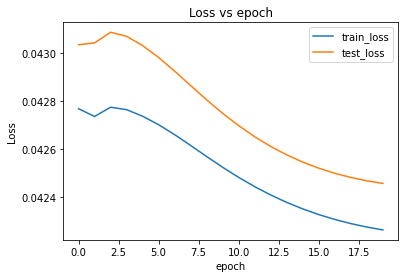

In [40]:
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss');

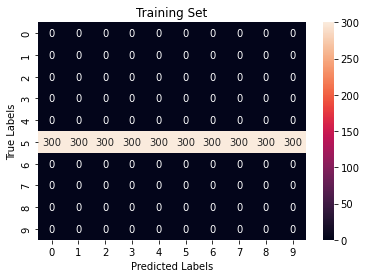

In [41]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

### Weights initialized to 1

In [42]:
pred=train(batchsize=1 , eta = 0.01, num_epochs=20, h = 256, init='ones')

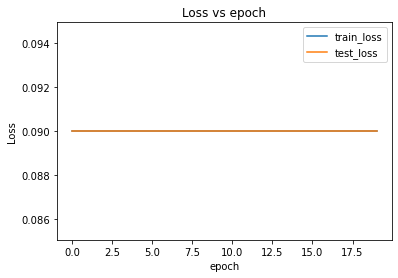

In [43]:
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss');

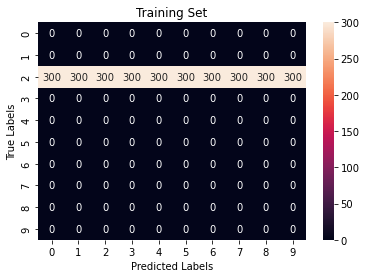

In [44]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

### Random Weights initialization

In [45]:
pred=train(batchsize=1 , eta = 0.01, num_epochs=20, h = 256, init='random')

Text(0, 0.5, 'Loss')

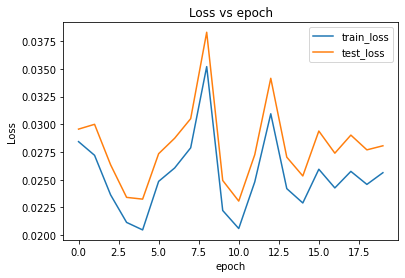

In [46]:
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

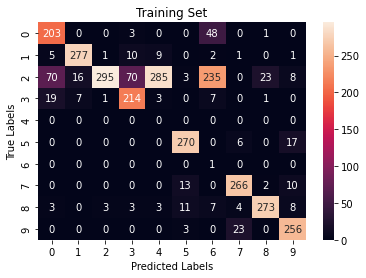

In [47]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

# Effect Of Learning Rate

In [60]:
def sigmoid_forward(a):
    # calculates the sigmoid activation function
    # a: pre-activation values
    # returns: activated values
    return np.exp(a)/(1+np.exp(a))

def sigmoid_backward(grad_accum, a):
    # grad_accum: the gradient of the loss function w.r.t to z
    # a: the pre-activation values
    # returns: the gradient of the loss w.r.t to the preactivation values, a
    return grad_accum*sigmoid_forward(a)*(1-sigmoid_forward(a))
    

def linear_forward(x, weight, bias):
    # Computes the forward pass of the linear layer
    # x: input of layer
    # weight, bias: weights and bias of neural network layer
    return bias+ np.dot(weight,x)

def linear_backward(grad_accum, x, weight, bias):
    #  Derivative of the linear layer w.r.t 
    # grad_accum: gradient of loss w.r.t function after linear layer
    # returns dl_dw: gradient of loss w.r.t to weights 
    # returns dl_dx: gradient of loss w.r.t to input, x  
    return np.dot(grad_accum.reshape(len(grad_accum),1),x.reshape(1,len(x)))
    
    
def softmax_xeloss_forward(b, labels):
    # Input parameters: 
    ## b: pre-activation 
    # calculates the softmax of the vector b
    # calculates the cross entropy loss between the softmax of b and the labels 
    # returns: l
    temp= np.exp(b- np.max(b,))
    y_pred= temp/np.sum(temp,axis=0) 
    loss= np.mean(0.5 * np.square(y_pred -labels))
    return loss, y_pred
    
    
def softmax_xeloss_backward(yhat, labels):
    # Input parameters:
    # yhat: predictions of the neural network
    # labels: target of the network
    # returns: dl_db gradient of loss w.r.t to b
    return yhat-labels
    
def data_load():
    # load in the data provided in "data/"
    train= np.loadtxt('fashion_mnist/train.csv', delimiter=',')
    test= np.loadtxt('fashion_mnist/test.csv', delimiter=',')
   
    X_train= train[:,:-1]
    y_train= train[:,-1]
    X_test= test[:,:-1]
    y_test= test[:,-1]
    return X_train, y_train, X_test, y_test

def load_params():
    alpha_weights = np.loadtxt('params/alpha1.txt', delimiter=',')
    beta_weights = np.loadtxt('params/alpha2.txt', delimiter=',')
    alpha_bias= np.loadtxt('params/beta1.txt', delimiter=',')
    beta_bias = np.loadtxt('params/beta2.txt', delimiter=',')
    return alpha_weights, beta_weights, alpha_bias, beta_bias

def one_hot_encode(y):
    encoded=[]
    for i in range(len(y)):
        a=np.zeros(10)
        a[int(y[i])]=1
        encoded.append(a)
    return encoded


def train(batchsize=1 , eta = 0.01, num_epochs=100, h = 256,init = 'random',lr=0.1):
    X_train, y_train, X_test, y_test = data_load()  
    
    y_train = one_hot_encode(y_train) 
    y_test = one_hot_encode(y_test) 

    if init == 'default':
        alpha_weights, beta_weights, alpha_bias, beta_bias = load_params()
    elif init=='zeros':
        alpha_weights=np.zeros((256, 784))
        beta_weights=np.zeros((10, 256))
        alpha_bias=np.zeros(256,)
        beta_bias=np.zeros(10,)
    elif init=='ones':
        alpha_weights=np.ones((256, 784))
        beta_weights=np.ones((10, 256))
        alpha_bias=np.ones((256,))
        beta_bias=np.ones((10,))
    elif init=='random':
        alpha_weights=np.random.uniform(-1,1,(256, 784))
        beta_weights=np.random.uniform(-1,1,(10, 256))
        alpha_bias=np.random.uniform(-1,1,(256,))
        beta_bias=np.random.uniform(-1,1,(10,))
    train_loss_list = []
    test_loss_list = []
    acc_list = []
    pred= [] 

    ### Weights and biases clubed for easy of matrix multiplication
    alpha_combined= np.hstack((alpha_bias.reshape((len(alpha_bias),1)), alpha_weights))
    beta_combined= np.hstack((beta_bias.reshape(len(beta_bias),1),beta_weights)) 
    for epoch in (range(num_epochs)):
        
        
        for j in range (0,int(len(y_train)),batchsize):
          
            ### Forward Pass
            x_biases= np.ones(np.shape(X_train[j][1]))
            x= np.hstack((x_biases,X_train[j]))  
            
            ### Linear Forward
            weight=alpha_combined[:,1:]
            bias=alpha_combined[:,1]
            a= linear_forward(x[1:].T,weight,bias)
            
            ### Sigmoid Forward
            z_weights= sigmoid_forward(a)
            z= np.hstack((np.ones(1), z_weights))  

            ### Linear Forward
            weight=beta_combined[:,1:]
            bias=beta_combined[:,1]
            b= linear_forward(z[1:],weight,bias)

            loss, y_pred= softmax_xeloss_forward(b, y_train[j])

            ### BackPropagation
            
            ### Sigmoid backwards
            dl_db= softmax_xeloss_backward(y_pred, y_train[j])
            
            ### Linear Backwards
            dl_dw2= np.dot(dl_db.reshape(len(dl_db), 1), z.reshape(1,len(z)))
            
            ### Sigmoid backwards
            dl_da= sigmoid_backward(np.dot(beta_combined[:,1:].T,dl_db), a)
            
            ### Linear Backwards
            weight=alpha_combined[:,1:]
            bias=alpha_combined[:,1]
            dl_dw1= linear_backward(dl_da, x, weight, bias)


            ### Updating weights
            alpha_combined = alpha_combined - lr*dl_dw1
            beta_combined = beta_combined - lr*dl_dw2
        error=0
        train_loss=[]
        for i in range(len(y_train)):
            x_biases= np.ones(np.shape(X_train[i][1]))
            x= np.hstack((x_biases,X_train[i]))
            a= np.dot(alpha_combined,x.T)
            weight=alpha_combined[:,1:]
            bias=alpha_combined[:,1]
            a= linear_forward(x[1:].T,weight,bias)
            
            ### Sigmoid Forward
            z_weights= sigmoid_forward(a)
            z= np.hstack((np.ones(1), z_weights))  

            ### Linear Forward
            weight=beta_combined[:,1:]
            bias=beta_combined[:,1]
            b= linear_forward(z[1:],weight,bias)

            loss, y_pred= softmax_xeloss_forward(b, y_train[i])
            prediction= np.argmax(y_pred)
            target=np.argmax(y_train[i])
            pred.append(prediction)
            if target!=prediction:
                error+=1   
            train_loss.append(loss)
        error= error/len(y_train)
        train_loss_list.append(np.mean(train_loss))
        pred.append(y_pred)
        error=0
        test_loss=[]
        for i in range(len(y_test)):
            x_biases= np.ones(np.shape(X_test[i][1]))
            x= np.hstack((x_biases,X_test[i]))
            a= np.dot(alpha_combined,x.T)
            weight=alpha_combined[:,1:]
            bias=alpha_combined[:,1]
            a= linear_forward(x[1:].T,weight,bias)
            
            ### Sigmoid Forward
            z_weights= sigmoid_forward(a)
            z= np.hstack((np.ones(1), z_weights))  

            ### Linear Forward
            weight=beta_combined[:,1:]
            bias=beta_combined[:,1]
            b= linear_forward(z[1:],weight,bias)

            loss, y_pred= softmax_xeloss_forward(b, y_test[i])
            test_loss.append(loss)
            prediction= np.argmax(y_pred)
            target=np.argmax(y_test[i])
            pred.append(prediction)
            if target!=prediction:
                error+=1          
        error= error/len(y_test)
        test_loss_list.append(np.mean(test_loss))   
    
    return train_loss_list, test_loss_list, pred

### LR = 0.5

In [74]:
pred=train(batchsize=50 , eta = 0.5, num_epochs=20, h = 256, init='default')

Text(0, 0.5, 'Loss')

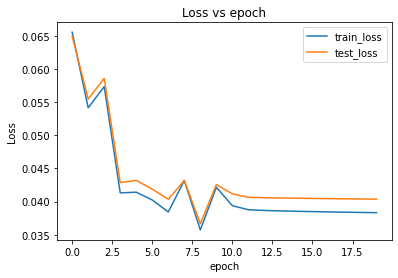

In [77]:
default_pred_0_05=pred[0]
default_pred_1_05=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

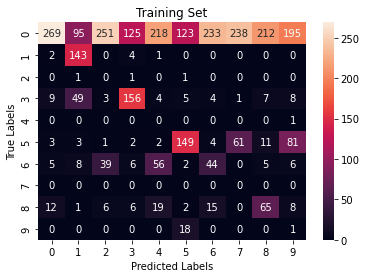

In [78]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

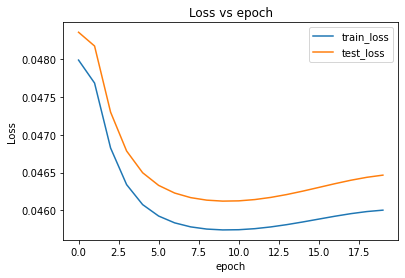

In [79]:
### Initilization = zeros
pred=train(batchsize=50 , eta = 0.5, num_epochs=20, h = 256, init='zeros')
zeros_pred_0_05=pred[0]
zeros_pred_1_05=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

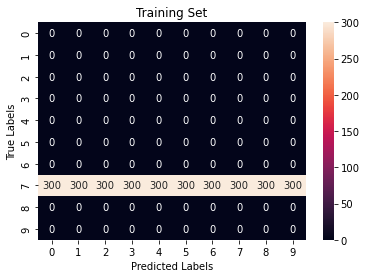

In [80]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

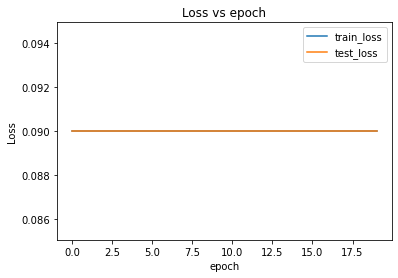

In [81]:
### initializations = ones
pred=train(batchsize=50 , eta = 0.5, num_epochs=20, h = 256, init='ones')
ones_pred_0_05=pred[0]
ones_pred_1_05=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

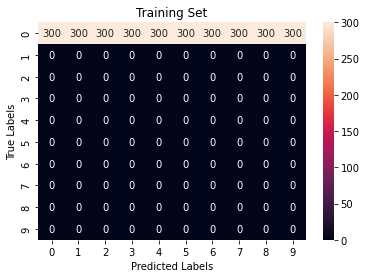

In [82]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

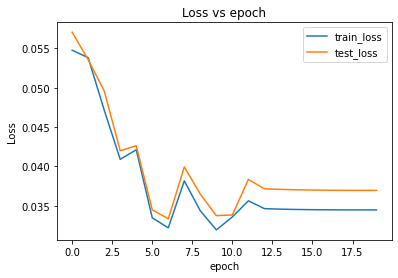

In [83]:
### initializations = random
pred=train(batchsize=50 , eta = 0.5, num_epochs=20, h = 256, init='random')
random_pred_0_05=pred[0]
random_pred_1_05=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

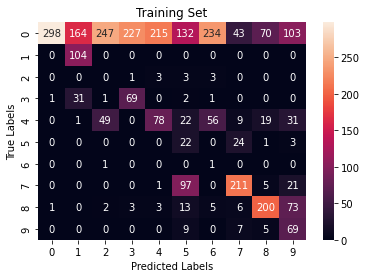

In [84]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

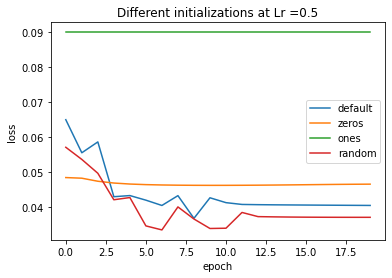

In [113]:
plt.plot(default_pred_1_05,label='default')
plt.plot(zeros_pred_1_05,label='zeros')
plt.plot(ones_pred_1_05,label='ones')
plt.plot(random_pred_1_05,label='random')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Different initializations at Lr =0.5');

### LR = 0.1

In [93]:
pred=train(batchsize=50 , eta = 0.1, num_epochs=20, h = 256, init='default')

Text(0, 0.5, 'Loss')

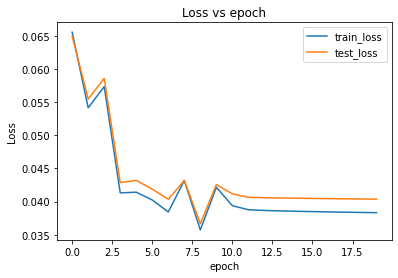

In [94]:
default_pred_0_01=pred[0]
default_pred_1_01=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

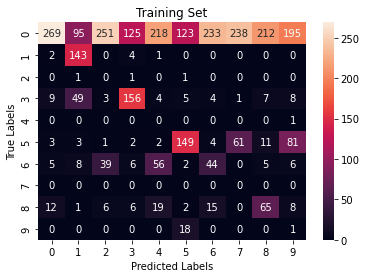

In [66]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

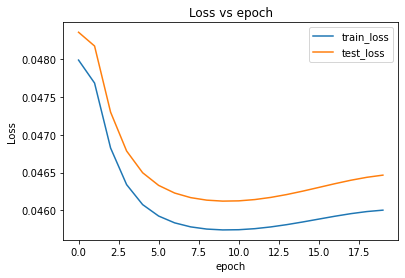

In [87]:
pred=train(batchsize=50 , eta = 0.1, num_epochs=20, h = 256, init='zeros')
zeros_pred_0_01=pred[0]
zeros_pred_1_01=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

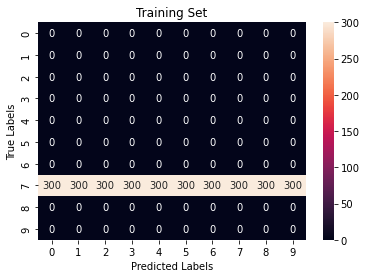

In [88]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

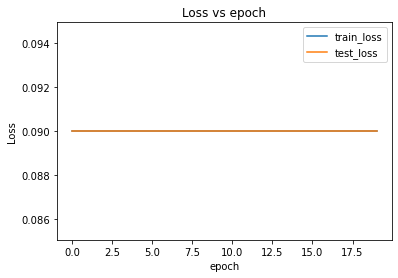

In [89]:
pred=train(batchsize=50 , eta = 0.1, num_epochs=20, h = 256, init='ones')
ones_pred_0_01=pred[0]
ones_pred_1_01=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

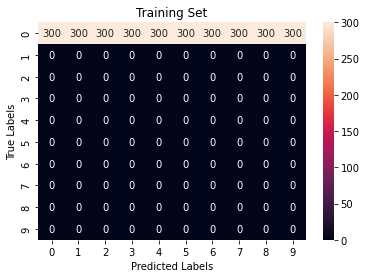

In [90]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

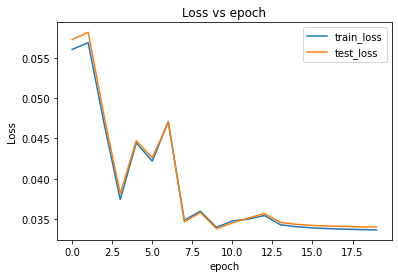

In [91]:
pred=train(batchsize=50 , eta = 0.1, num_epochs=20, h = 256, init='random')
random_pred_0_01=pred[0]
random_pred_1_01=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

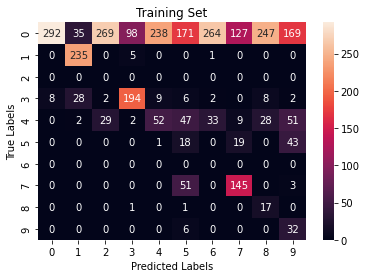

In [92]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

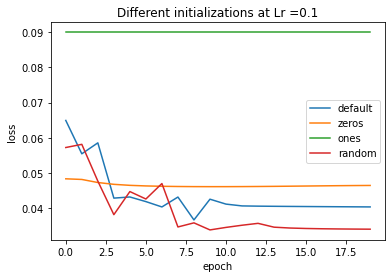

In [114]:
plt.plot(default_pred_1_01,label='default')
plt.plot(zeros_pred_1_01,label='zeros')
plt.plot(ones_pred_1_01,label='ones')
plt.plot(random_pred_1_01,label='random')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Different initializations at Lr =0.1');

### LR = 0.01

In [95]:
pred=train(batchsize=50 , eta = 0.01, num_epochs=20, h = 256, init='default')

Text(0, 0.5, 'Loss')

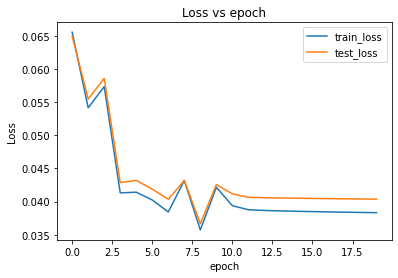

In [96]:
default_pred_0_001=pred[0]
default_pred_1_001=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

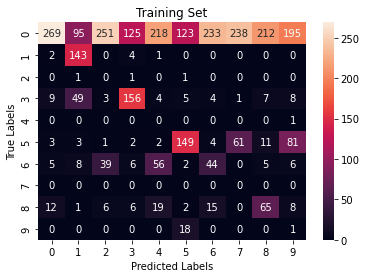

In [97]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

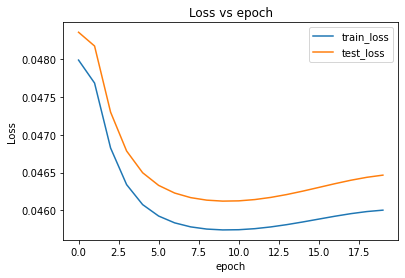

In [98]:
pred=train(batchsize=50 , eta = 0.01, num_epochs=20, h = 256, init='zeros')
zeros_pred_0_001=pred[0]
zeros_pred_1_001=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

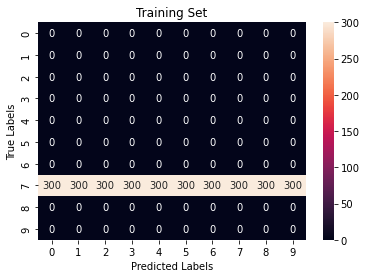

In [99]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

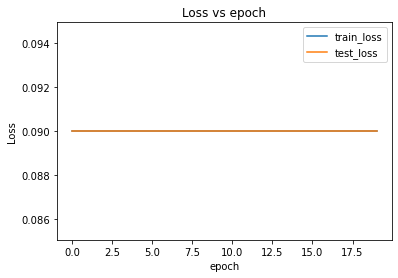

In [100]:
pred=train(batchsize=50 , eta = 0.01, num_epochs=20, h = 256, init='ones')
ones_pred_0_001=pred[0]
ones_pred_1_001=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

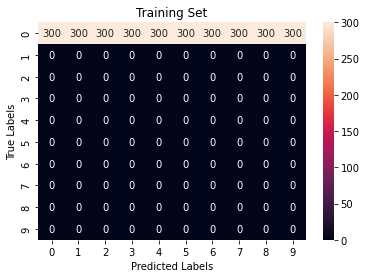

In [101]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

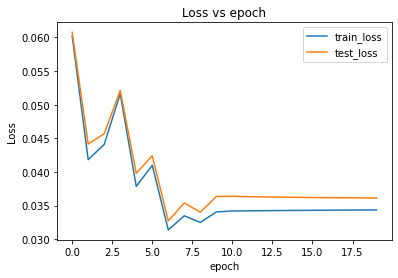

In [102]:
pred=train(batchsize=50 , eta = 0.01, num_epochs=20, h = 256, init='random')
random_pred_0_001=pred[0]
random_pred_1_001=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

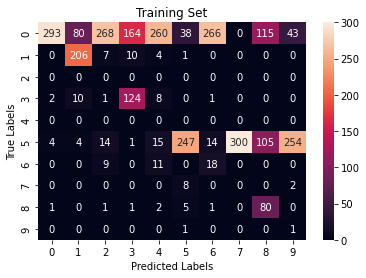

In [103]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

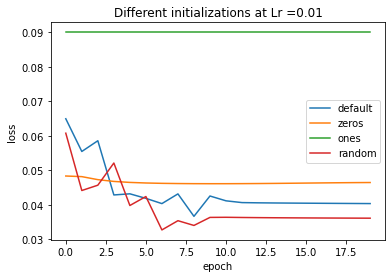

In [115]:
plt.plot(default_pred_1_001,label='default')
plt.plot(zeros_pred_1_001,label='zeros')
plt.plot(ones_pred_1_001,label='ones')
plt.plot(random_pred_1_001,label='random')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Different initializations at Lr =0.01');

### LR = 0.001

In [104]:
pred=train(batchsize=50 , eta = 0.001, num_epochs=20, h = 256, init='default')

Text(0, 0.5, 'Loss')

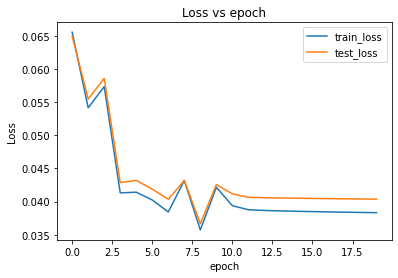

In [105]:
default_pred_0_0001=pred[0]
default_pred_1_0001=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

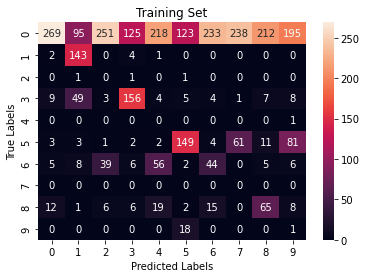

In [106]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

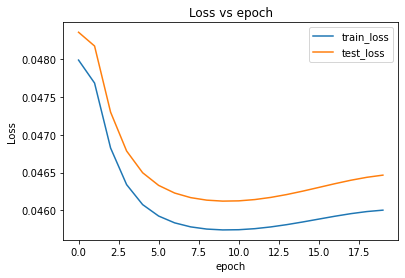

In [107]:
pred=train(batchsize=50 , eta = 0.001, num_epochs=20, h = 256, init='zeros')
zeros_pred_0_0001=pred[0]
zeros_pred_1_0001=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

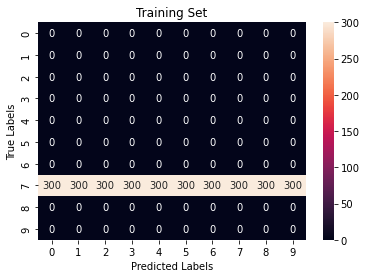

In [108]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

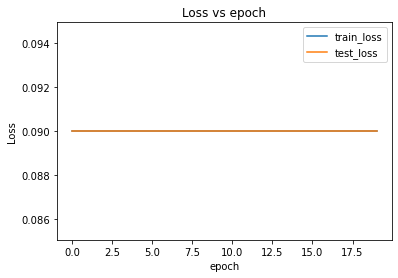

In [109]:
pred=train(batchsize=50 , eta = 0.001, num_epochs=20, h = 256, init='ones')
ones_pred_0_0001=pred[0]
ones_pred_1_0001=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

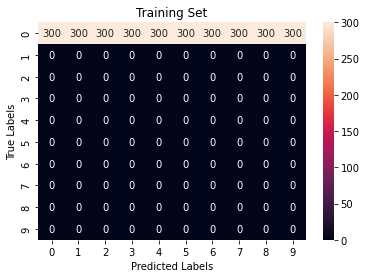

In [110]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

Text(0, 0.5, 'Loss')

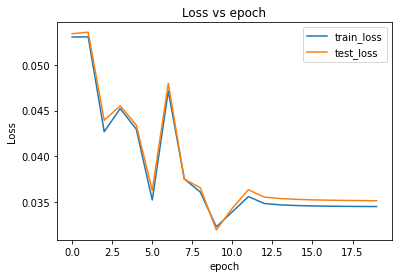

In [111]:
pred=train(batchsize=50 , eta = 0.001, num_epochs=20, h = 256, init='random')
random_pred_0_0001=pred[0]
random_pred_1_0001=pred[1]
plt.plot(pred[0],label='train_loss')
plt.plot(pred[1],label='test_loss')
plt.legend()
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

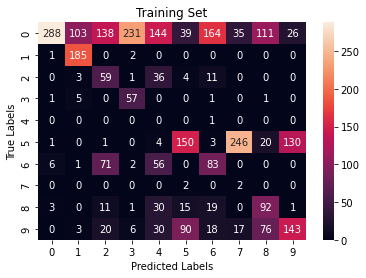

In [112]:
true_y=[]
for i in range(len(y_train)):
    true_y.append(y_train[i])
plot_confusion(pred[2], true_y,'Training Set')

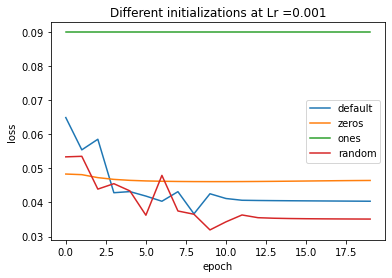

In [116]:
plt.plot(default_pred_1_0001,label='default')
plt.plot(zeros_pred_1_0001,label='zeros')
plt.plot(ones_pred_1_0001,label='ones')
plt.plot(random_pred_1_0001,label='random')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Different initializations at Lr =0.001');